In [563]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

from pca import pca

import matplotlib.pyplot as plt


from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
sns.set_theme()

import dataframe_image as dfi

In [564]:
df = pd.read_csv("train.csv")

Id - идентификационный номер квартиры

DistrictId - идентификационный номер района (факторный регрессор)

Rooms - количество комнат (колличественный регрессор)

Square - площадь (колличественный регрессор)

LifeSquare - жилая площадь (колличественный регрессор)

KitchenSquare - площадь кухни (колличественный регрессор)

Floor - этаж (колличественный регрессор)

HouseFloor - количество этажей в доме (колличественный регрессор)

HouseYear - год постройки дома (колличественный регрессор)

Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности  (колличественный регрессор), (факторный регрессор), (факторный регрессор)

Social_1, Social_2, Social_3 - социальные показатели местности (колличественный регрессор), (колличественный регрессор), (колличественный регрессор)

Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья (колличественный регрессор)

Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров (колличественный регрессор), (факторный регрессор)

Price - цена квартиры


In [565]:
numeric_features = ["Rooms", "Square", "LifeSquare", "KitchenSquare", "Floor", "HouseFloor", "HouseYear", "Ecology_1", "Social_1", "Social_2", "Social_3", "Helthcare_2", "Shops_1"]
discret_features = ["DistrictId", "Ecology_2", "Ecology_3", "Shops_2"]

In [566]:
df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808


In [567]:
df_life = df[pd.notnull(df['LifeSquare'])]

In [568]:
df_life = df_life[
    ((df_life["LifeSquare"] + df_life["KitchenSquare"]) < df_life["Square"])
    & (df_life["HouseYear"] < 2022)  & (df_life["KitchenSquare"] < 20) & (df_life["LifeSquare"] < 200) & (df_life["Square"] < 300) ]




In [569]:
df_life

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,48,13,3.0,80.631333,48.899083,10.0,11,14.0,1999,0.090799,B,B,74,19083,2,NaN,5,15,B,350684.628560
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808


In [570]:
df_life_group_ = df_life.groupby(by=["DistrictId", "Rooms", "HouseYear", "HouseFloor"]).mean()
df_life_group_

Id     Square  LifeSquare  \
DistrictId Rooms HouseYear HouseFloor                                   
0          1.0   1961      5.0         10867.5  25.233207   17.165192   
                 1962      5.0         14236.0  19.927423   15.541536   
                           8.0          1975.0  34.890672   18.788704   
                 1963      5.0         11590.0  34.354485   22.000892   
                 1964      9.0          3789.0  36.765160   22.094905   
...                                        ...        ...         ...   
205        1.0   2007      12.0        16543.0  43.226985   18.663548   
207        3.0   1931      5.0         11120.0  76.780960   55.770043   
208        2.0   1954      7.0         15838.0  53.121383   33.935922   
                 1957      9.0         16060.0  54.600295   32.859246   
209        1.0   1965      5.0         11911.0  33.533077   18.101125   

                                       KitchenSquare      Floor     Ecology_1  \
DistrictId Rooms HouseYear HouseFloor                                           
0          1.0   1961      5.0              2.500000   6.000000  3.198094e-01   
                 1962      5.0              0.000000   2.000000  3.198094e-01   
                           8.0              6.000000   6.000000  3.198094e-01   
                 1963      5.0              6.333333   3.666667  3.198094e-01   
                 1964      9.0              5.000000  10.000000  3.198094e-01   
...                                              ...        ...           ...   
205        1.0   2007      12.0             8.000000  12.000000  1.690911e-01   
207        3.0   1931      5.0              7.000000   2.000000  1.800000e-09   
208        2.0   1954      7.0              7.000000   7.000000  8.194346e-02   
                 1957      9.0              8.000000  10.000000  8.194346e-02   
209        1.0   1965      5.0              5.000000   7.000000  4.024276e-02   

                                       Social_1  Social_2  Social_3  \
DistrictId Rooms HouseYear HouseFloor                                 
0          1.0   1961      5.0             25.0    4756.0      16.0   
                 1962      5.0             25.0    4756.0      16.0   
                           8.0             25.0    4756.0      16.0   
                 1963      5.0             25.0    4756.0      16.0   
                 1964      9.0             25.0    4756.0      16.0   
...                                         ...       ...       ...   
205        1.0   2007      12.0            19.0    3856.0      10.0   
207        3.0   1931      5.0             16.0    3681.0      73.0   
208        2.0   1954      7.0             20.0    2738.0      20.0   
                 1957      9.0             20.0    2738.0      20.0   
209        1.0   1965      5.0             25.0    3478.0      11.0   

                                       Healthcare_1  Helthcare_2  Shops_1  \
DistrictId Rooms HouseYear HouseFloor                                       
0          1.0   1961      5.0               2857.0          5.0      8.0   
                 1962      5.0               2857.0          5.0      8.0   
                           8.0               2857.0          5.0      8.0   
                 1963      5.0               2857.0          5.0      8.0   
                 1964      9.0               2857.0          5.0      8.0   
...                                             ...          ...      ...   
205        1.0   2007      12.0                 NaN          2.0      5.0   
207        3.0   1931      5.0               1815.0          2.0      5.0   
208        2.0   1954      7.0                  NaN          1.0      4.0   
                 1957      9.0                  NaN          1.0      4.0   
209        1.0   1965      5.0               2729.0          3.0      1.0   

                                               Price  
DistrictId Rooms HouseYear HouseFloor                 
0   

In [571]:
df_life_group = df_life.groupby(by=["DistrictId", "Rooms", "HouseYear", "HouseFloor"])["LifeSquare"].mean()

In [572]:
df_life_group[(23, 2.0, 1977, 3.0)]

53.12614711830302

In [573]:
df_life_group.keys()[0]

(0, 1.0, 1961, 5.0)

In [574]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [575]:
df_life_null = df[pd.isnull(df['LifeSquare'])]

In [576]:
df_life_null_group = df_life_null.groupby(by=["DistrictId", "Rooms", "HouseYear", "HouseFloor"])["Square"].count()

In [577]:
df_life_null_group.keys()

MultiIndex([(  0, 1.0, 2016, 15.0),
            (  0, 2.0, 1977, 17.0),
            (  1, 1.0, 1977,  0.0),
            (  1, 1.0, 1977,  1.0),
            (  1, 1.0, 1977,  3.0),
            (  1, 1.0, 1977,  4.0),
            (  1, 1.0, 1977,  7.0),
            (  1, 1.0, 1977,  9.0),
            (  1, 1.0, 1977, 10.0),
            (  1, 1.0, 1977, 16.0),
            ...
            (148, 3.0, 1977, 17.0),
            (148, 3.0, 2012,  1.0),
            (168, 1.0, 1977,  0.0),
            (169, 1.0, 1977,  0.0),
            (169, 1.0, 2015,  1.0),
            (169, 2.0, 2018, 16.0),
            (169, 3.0, 2015, 16.0),
            (187, 1.0, 1977,  4.0),
            (187, 1.0, 1977, 10.0),
            (190, 2.0, 1977, 20.0)],
           names=['DistrictId', 'Rooms', 'HouseYear', 'HouseFloor'], length=581)

In [578]:
LifeSquares_null = {}

c = 0
for key in df_life_null_group.keys():
    if df_life_group.get(key) is not None:
        LifeSquares_null[key] = df_life_group.get(key)
        c += df_life_null_group.get(key)

In [579]:
for k in LifeSquares_null.keys():
    break

In [580]:
import math
lifeSquare_res = []


t = 0
for v in df[["LifeSquare", "DistrictId", "Rooms", "HouseYear", "HouseFloor", "Square", "KitchenSquare"]].values:
    if math.isnan(v[0]):
        key = (int(v[1]), float(v[2]), int(v[3]), float(v[4]))
        pred_life_sq = LifeSquares_null.get(key)
        if pred_life_sq is not None:
            if (pred_life_sq + v[6]) > v[5]:
                lifeSquare_res.append(v[5] - v[6] - 1)
            else:
                lifeSquare_res.append(pred_life_sq)
        else:
            lifeSquare_res.append(v[5] - v[6] - 1)
    else:
        lifeSquare_res.append(v[0])

In [581]:
len(df[["LifeSquare", "DistrictId", "Rooms", "HouseYear", "HouseFloor"]].values)

10000

In [582]:
df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808


In [583]:
df["LifeSquare"] = lifeSquare_res

In [584]:
df = df[df["LifeSquare"].isnull() == False]

In [585]:
df = df.drop('Healthcare_1', 1)

#df = df[df["Healthcare_1"].isnull() == False]

In [636]:
df = df[
    ((df["LifeSquare"] + df["KitchenSquare"]) < df["Square"])
    & (df["HouseYear"] < 2022)  & (df["KitchenSquare"] < 20) & (df["LifeSquare"] < 200) & (df["Square"] < 300) ]




In [637]:
df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,Price_bin,preds,e
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,51,0.089040,...,33,7976,5,0,11,B,184966.930730,200k,213290.713448,1.730079e+09
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,42,0.000070,...,46,10309,1,1,16,B,300009.450063,350k,276575.444398,9.250878e+08
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,52,0.049637,...,34,7759,0,1,3,B,220925.908524,250k,231543.388244,1.350717e+08
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,44,0.012339,...,35,5776,1,2,4,B,150226.531644,200k,153961.469398,4.667078e+07
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,9,0.309479,...,35,7715,4,0,6,B,215898.447742,250k,341321.408748,1.588844e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,52,0.135650,...,46,7960,6,3,11,B,196684.316040,200k,246181.177032,2.793397e+09
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,20,0.000000,...,30,5562,0,0,5,A,189050.289571,200k,168818.829656,5.754004e+08
9997,5123,27,1.0,47.939008,45.939008,1.0,12,16.0,5,0.072158,...,2,629,1,0,0,A,159143.805370,200k,125999.296405,1.112216e+09
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,59,0.307467,...,30,5048,9,2,5,B,181595.339808,200k,183931.685709,1.491682e+07


In [638]:
df = df[((df["LifeSquare"] + df["KitchenSquare"]) < df["Square"]) & (df["HouseYear"] < 2022) & (df["Rooms"] > 0)]




In [639]:
df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,Price_bin,preds,e
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,51,0.089040,...,33,7976,5,0,11,B,184966.930730,200k,213290.713448,1.730079e+09
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,42,0.000070,...,46,10309,1,1,16,B,300009.450063,350k,276575.444398,9.250878e+08
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,52,0.049637,...,34,7759,0,1,3,B,220925.908524,250k,231543.388244,1.350717e+08
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,44,0.012339,...,35,5776,1,2,4,B,150226.531644,200k,153961.469398,4.667078e+07
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,9,0.309479,...,35,7715,4,0,6,B,215898.447742,250k,341321.408748,1.588844e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,52,0.135650,...,46,7960,6,3,11,B,196684.316040,200k,246181.177032,2.793397e+09
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,20,0.000000,...,30,5562,0,0,5,A,189050.289571,200k,168818.829656,5.754004e+08
9997,5123,27,1.0,47.939008,45.939008,1.0,12,16.0,5,0.072158,...,2,629,1,0,0,A,159143.805370,200k,125999.296405,1.112216e+09
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,59,0.307467,...,30,5048,9,2,5,B,181595.339808,200k,183931.685709,1.491682e+07


In [640]:
import numpy as np

conditions = [
    (df['Price'] < 100000),
    (df['Price'] < 150000) & (df['Price'] >= 100000),
    (df['Price'] < 200000) & (df['Price'] >= 150000),
    (df['Price'] < 250000) & (df['Price'] >= 200000),
    (df['Price'] < 300000) & (df['Price'] >= 250000),
    (df['Price'] < 400000) & (df['Price'] >= 300000),
    (df['Price'] < 450000) & (df['Price'] >= 350000),
    (df['Price'] >= 400000)]
choices = ['100k', '150k', '200k', '250k', '300k', '350k', '400k', '450k+']
df['Price_bin'] = np.select(conditions, choices, default='100k')
df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,Price_bin,preds,e
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,51,0.089040,...,33,7976,5,0,11,B,184966.930730,200k,213290.713448,1.730079e+09
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,42,0.000070,...,46,10309,1,1,16,B,300009.450063,350k,276575.444398,9.250878e+08
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,52,0.049637,...,34,7759,0,1,3,B,220925.908524,250k,231543.388244,1.350717e+08
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,44,0.012339,...,35,5776,1,2,4,B,150226.531644,200k,153961.469398,4.667078e+07
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,9,0.309479,...,35,7715,4,0,6,B,215898.447742,250k,341321.408748,1.588844e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,52,0.135650,...,46,7960,6,3,11,B,196684.316040,200k,246181.177032,2.793397e+09
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,20,0.000000,...,30,5562,0,0,5,A,189050.289571,200k,168818.829656,5.754004e+08
9997,5123,27,1.0,47.939008,45.939008,1.0,12,16.0,5,0.072158,...,2,629,1,0,0,A,159143.805370,200k,125999.296405,1.112216e+09
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,59,0.307467,...,30,5048,9,2,5,B,181595.339808,200k,183931.685709,1.491682e+07


In [641]:
pca_model = pca(n_components=2, normalize=True, random_state=69)
pca_fit = pca_model.fit_transform(df[numeric_features][:1000])


[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


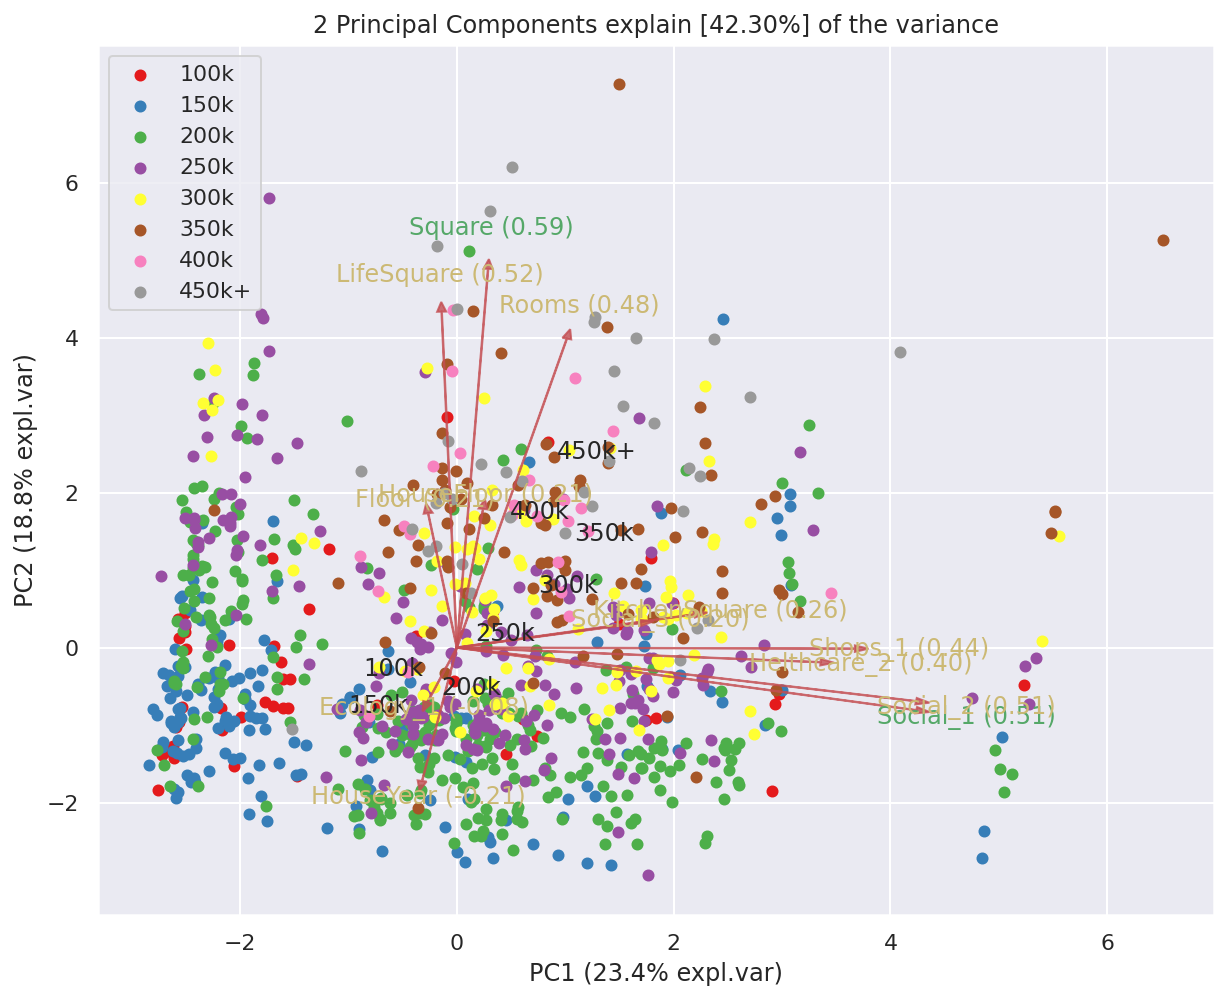

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2aa7657128>)

In [642]:
pca_model.biplot(y=df['Price_bin'][:1000])

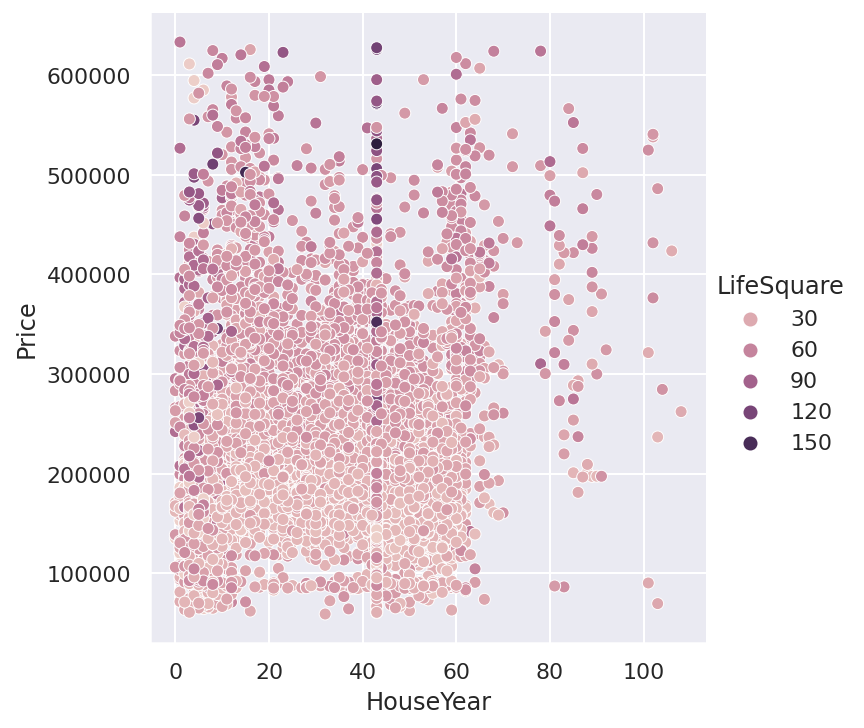

In [643]:
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,8)})

sns.relplot(
    data=df[(df["HouseYear"] < 2100) & (df["LifeSquare"] < 200)],
    x="HouseYear", y="Price", hue="LifeSquare"
)


/home/veroslovets/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/veroslovets/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/veroslovets/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/veroslovets/.local/lib/python

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2aa7361358>,
      dtype=object)

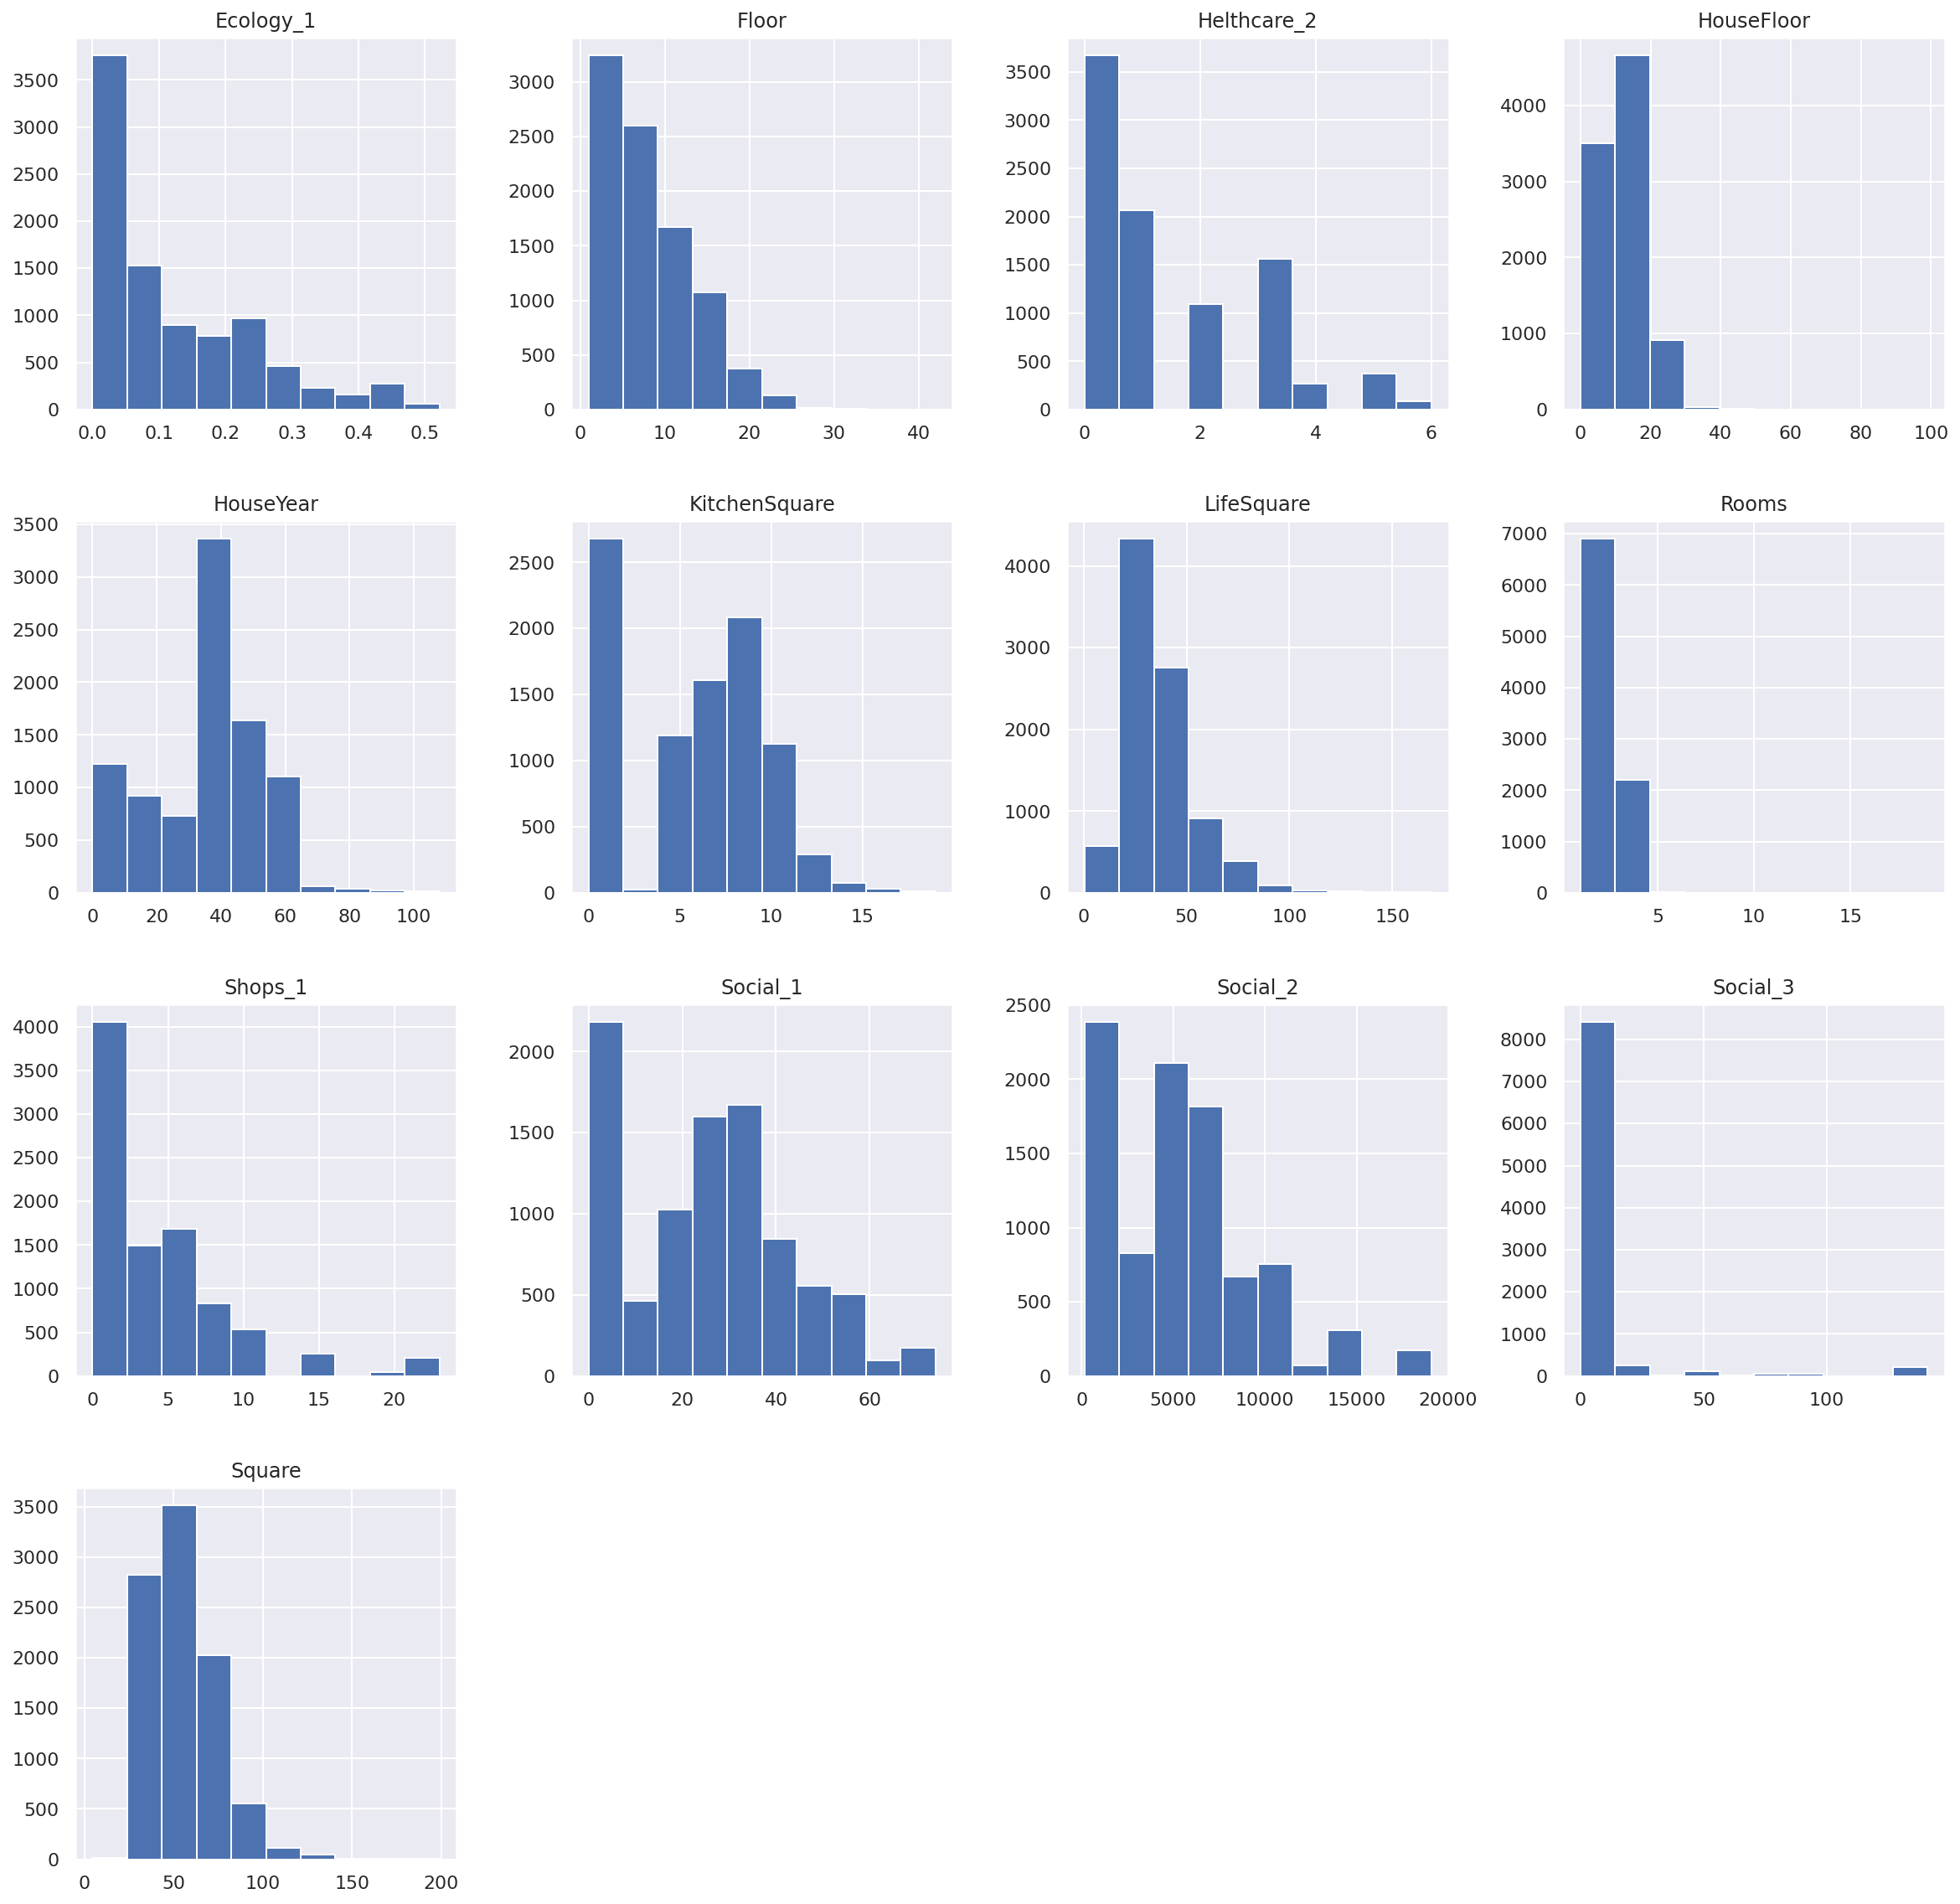

In [644]:
sns.set(rc={'figure.figsize':(20,20)})

df[numeric_features + discret_features].hist()

In [645]:
[(numeric_features[i], variance_inflation_factor(df[numeric_features].values, i)) for i in range(len(numeric_features))]

[('Rooms', 15.812650581296717),
 ('Square', 35.54819762443475),
 ('LifeSquare', 13.30975557021846),
 ('KitchenSquare', 4.985281869902872),
 ('Floor', 4.543383658088961),
 ('HouseFloor', 5.8652474756001105),
 ('HouseYear', 4.184626346068918),
 ('Ecology_1', 2.018994032627521),
 ('Social_1', 44.58986603882956),
 ('Social_2', 36.361744047308825),
 ('Social_3', 2.7025429052793783),
 ('Helthcare_2', 2.906388843664176),
 ('Shops_1', 5.99454510606993)]

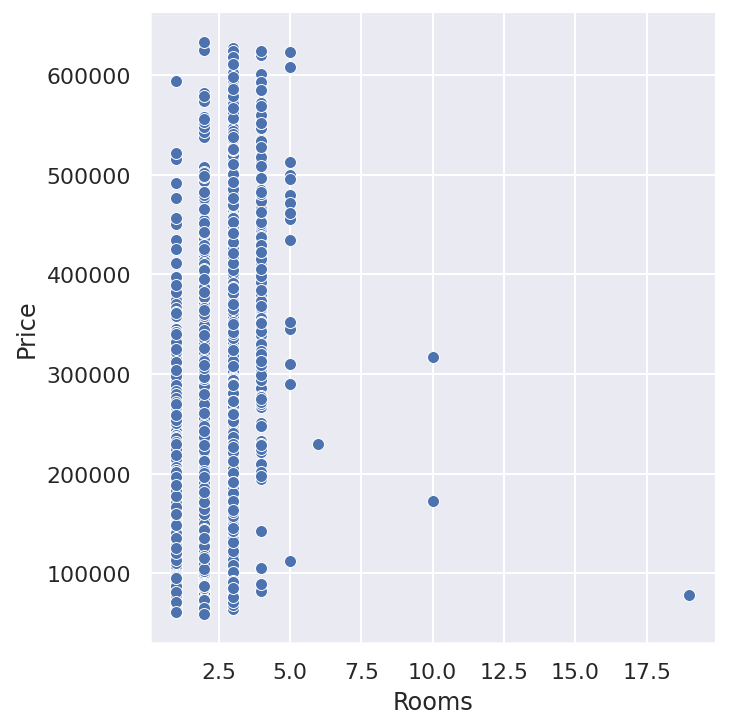

In [646]:
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,8)})

sns.relplot(
    data=df,
    x="Rooms", y="Price"
)

In [647]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,9117.0,8.389635e+03,4.853506e+03,0.000000e+00,4.184000e+03,8.404000e+03,1.260200e+04,1.679800e+04
Rooms,9117.0,1.901832e+00,8.367872e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.900000e+01
Square,9117.0,5.581270e+01,1.826755e+01,4.633498e+00,4.178291e+01,5.234566e+01,6.563713e+01,1.989302e+02
LifeSquare,9117.0,3.619158e+01,1.836207e+01,3.706194e-01,2.276548e+01,3.290154e+01,4.563970e+01,1.690169e+02
KitchenSquare,9117.0,5.763848e+00,3.769618e+00,0.000000e+00,1.000000e+00,6.000000e+00,9.000000e+00,1.900000e+01
Floor,9117.0,8.408358e+00,5.140572e+00,1.000000e+00,4.000000e+00,7.000000e+00,1.200000e+01,4.200000e+01
HouseFloor,9117.0,1.246485e+01,6.527106e+00,0.000000e+00,9.000000e+00,1.200000e+01,1.700000e+01,9.900000e+01
HouseYear,9117.0,3.662257e+01,1.753979e+01,0.000000e+00,2.400000e+01,4.300000e+01,4.700000e+01,1.080000e+02
Ecology_1,9117.0,1.201270e-01,1.198260e-01,0.000000e+00,1.764705e-02,7.577876e-02,1.957811e-01,5.218671e-01
Social_1,9117.0,2.546945e+01,1.738495e+01,0.000000e+00,9.000000e+00,2.500000e+01,3.600000e+01,7.400000e+01


In [648]:
import matplotlib.pyplot as plt

In [649]:
df[numeric_features + ["Price"]].corr().style.background_gradient(cmap='coolwarm', axis=None).format('{0:,.3f}').set_properties(padding="4px", border='2px solid white')


,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
Rooms,1.000,0.750,0.584,0.133,0.000,-0.032,0.032,-0.031,0.066,0.059,0.013,0.063,0.048,0.560
Square,0.750,1.000,0.758,0.080,0.132,0.102,-0.199,-0.071,-0.091,-0.060,0.023,-0.037,0.006,0.593
LifeSquare,0.584,0.758,1.000,-0.161,0.084,0.045,-0.065,-0.115,-0.140,-0.118,0.056,-0.057,0.011,0.393
KitchenSquare,0.133,0.080,-0.161,1.000,-0.015,0.186,-0.202,0.029,0.412,0.372,-0.073,0.234,0.124,0.337
Floor,0.000,0.132,0.084,-0.015,1.000,0.435,-0.298,-0.018,-0.060,-0.030,0.010,-0.071,0.022,0.119
HouseFloor,-0.032,0.102,0.045,0.186,0.435,1.000,-0.435,-0.008,-0.014,0.016,-0.013,-0.070,0.032,0.095
HouseYear,0.032,-0.199,-0.065,-0.202,-0.298,-0.435,1.000,0.060,0.012,-0.050,0.057,0.105,-0.012,-0.043
Ecology_1,-0.031,-0.071,-0.115,0.029,-0.018,-0.008,0.060,1.000,0.011,-0.004,-0.118,0.024,-0.079,-0.060
Social_1,0.066,-0.091,-0.140,0.412,-0.060,-0.014,0.012,0.011,1.000,0.953,0.011,0.514,0.519,0.238
Social_2,0.059,-0.060,-0.118,0.372,-0.030,0.016,-0.050,-0.004,0.953,1.000,0.061,0.464,0.550,0.214


In [650]:
import numpy as np
df_cor = df[numeric_features].corr()
pd.DataFrame(np.linalg.inv(df[numeric_features].corr().values), index = df_cor.index, columns=df_cor.columns).style.background_gradient(cmap='coolwarm', axis=None)

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1
Rooms,2.65526,-2.00652,-0.152616,-0.194807,0.0720884,0.091408,-0.446196,-0.0332666,-0.599575,0.288557,-0.0275983,0.00702458,0.0641285
Square,-2.00652,4.2724,-2.02273,-0.474456,-0.197614,0.0551265,0.610882,-0.0305792,1.05308,-0.618731,0.0477452,-0.0334627,-0.0605852
LifeSquare,-0.152616,-2.02273,2.7315,0.635436,0.0590669,-0.121046,-0.122952,0.152492,-0.242895,0.261116,0.0202205,-0.00601814,-0.105005
KitchenSquare,-0.194807,-0.474456,0.635436,1.52801,0.161532,-0.272052,0.241027,0.00258373,-1.02888,0.440122,-0.0386349,-0.113208,0.192763
Floor,0.0720884,-0.197614,0.0590669,0.161532,1.29071,-0.499996,0.15885,-0.00298886,0.0185697,-0.00727248,0.0162542,0.00779449,-0.0532753
HouseFloor,0.091408,0.0551265,-0.121046,-0.272052,-0.499996,1.46487,0.423181,-0.0295117,0.123096,-0.0257144,0.0282564,0.0637144,-0.0998106
HouseYear,-0.446196,0.610882,-0.122952,0.241027,0.15885,0.423181,1.47325,-0.0697051,-0.673384,0.668019,-0.147222,-0.097722,0.108029
Ecology_1,-0.0332666,-0.0305792,0.152492,0.00258373,-0.00298886,-0.0295117,-0.0697051,1.03589,0.0202027,0.0200593,0.132495,-0.0706399,0.00730272
Social_1,-0.599575,1.05308,-0.242895,-1.02888,0.0185697,0.123096,-0.673384,0.0202027,14.2167,-12.0944,1.53491,-1.29457,-0.968238
Social_2,0.288557,-0.618731,0.261116,0.440122,-0.00727248,-0.0257144,0.668019,0.0200593,-12.0944,12.508,-0.327376,0.662701,-0.762969


In [651]:
for col in ["DistrictId", "Ecology_2", "Ecology_3", "Shops_2"]:
    df[col] = pd.Categorical(df[col])

In [652]:
df["HouseYear"] = df["HouseYear"].max() - df["HouseYear"]

In [653]:
df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,Price_bin,preds,e
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,57,0.089040,...,33,7976,5,0,11,B,184966.930730,200k,213290.713448,1.730079e+09
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,66,0.000070,...,46,10309,1,1,16,B,300009.450063,350k,276575.444398,9.250878e+08
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,56,0.049637,...,34,7759,0,1,3,B,220925.908524,250k,231543.388244,1.350717e+08
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,64,0.012339,...,35,5776,1,2,4,B,150226.531644,200k,153961.469398,4.667078e+07
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,99,0.309479,...,35,7715,4,0,6,B,215898.447742,250k,341321.408748,1.588844e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,56,0.135650,...,46,7960,6,3,11,B,196684.316040,200k,246181.177032,2.793397e+09
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,88,0.000000,...,30,5562,0,0,5,A,189050.289571,200k,168818.829656,5.754004e+08
9997,5123,27,1.0,47.939008,45.939008,1.0,12,16.0,103,0.072158,...,2,629,1,0,0,A,159143.805370,200k,125999.296405,1.112216e+09
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,49,0.307467,...,30,5048,9,2,5,B,181595.339808,200k,183931.685709,1.491682e+07


In [654]:
np.exp(np.exp(df_tmp_["Ecology_1"]))

0       2.718333
1       2.718282
2       2.718286
4       2.718282
5       2.732225
          ...   
9995    2.718621
9996    2.718282
9997    2.718302
9998    2.731819
9999    2.718282
Name: Ecology_1, Length: 9145, dtype: float64

In [655]:
scaler.fit_transform(np.expand_dims(df_tmp_["Social_2"], axis=1))

array([[ 0.70545498],
       [ 0.93467974],
       [ 0.68081265],
       ...,
       [-1.56273909],
       [ 0.29680069],
       [ 0.25142726]])

In [656]:
df_tmp_

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,Price_bin
0,14038,35,0.909297,1.681074,926.761061,1.912931,1.626577,9.0,6765201,1.875543e-05,B,B,3.526361,8.984318,1.791759,1.000000,11,B,430.077819,200k
1,15053,41,0.141120,1.817457,1685.064941,2.080084,1.626577,9.0,3111696,2.007439e-19,B,B,3.850148,9.240870,0.693147,1.414214,16,B,547.731184,350k
2,4765,53,0.909297,1.652710,911.895752,1.000000,1.681793,12.0,7311616,1.352493e-06,B,B,3.555348,8.956738,0.000000,1.414214,3,B,470.027561,250k
4,10783,99,0.841471,1.598234,613.858556,2.000000,1.821160,12.0,3748096,2.574790e-09,B,B,3.583519,8.661640,0.693147,1.732051,4,B,387.590675,200k
5,12915,59,0.141120,1.905172,2273.737165,2.351335,1.495349,17.0,6561,5.103183e-03,B,B,3.583519,8.951051,1.609438,1.000000,6,B,464.648736,250k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,0.909297,1.702446,990.751364,1.817121,1.565085,5.0,7311616,1.247056e-04,B,B,3.850148,8.982310,1.945910,2.000000,11,B,443.491055,200k
9996,6159,18,0.841471,1.618274,463.937823,2.154435,1.898829,13.0,160000,0.000000e+00,B,B,3.433987,8.623893,0.000000,1.000000,5,A,434.799137,200k
9997,5123,27,0.841471,1.680689,2203.270441,1.259921,1.861210,16.0,625,7.282305e-06,B,B,1.098612,6.445720,0.693147,1.000000,0,A,398.928321,200k
9998,5400,75,0.909297,1.639512,1213.835875,2.080084,1.000000,5.0,12117361,4.955542e-03,B,A,3.433987,8.526945,2.302585,1.732051,5,B,426.140047,200k


In [657]:
df_tmp_ = df.copy()

scaler = StandardScaler()

df_tmp_["Price"] = df_tmp_["Price"] ** (1/2)
df_tmp_["Square"] = np.log10(df_tmp_["Square"])

df_tmp_["HouseYear"] = df_tmp_["HouseYear"] ** 4

df_tmp_["Rooms"] = np.sin(df_tmp_["Rooms"])

df_tmp_["Floor"] = df_tmp_["Floor"] ** (1/4)


df_tmp_["HouseFloor"] = df_tmp_["HouseFloor"]

df_tmp_["Ecology_1"] = df_tmp_["Ecology_1"] ** 4.5

df_tmp_["Social_2"] = np.log(df_tmp_["Social_2"] + 1)

df_tmp_["Social_3"] = np.log(df_tmp_["Social_3"] + 1)

df_tmp_["Social_1"] = np.log(df_tmp_["Social_1"] + 1)

df_tmp_["KitchenSquare"] = (df_tmp_["KitchenSquare"] + 1) ** (1/3)

df_tmp_["LifeSquare"] = (df_tmp_["LifeSquare"] + 1) ** 2

df_tmp_["Helthcare_2"] = (df_tmp_["Helthcare_2"] + 1) ** (1/2)


model = smf.ols('Price ~ Square + HouseYear + Shops_1 + Rooms + Floor + HouseFloor + Ecology_1 + Ecology_3 + Social_3 + Social_1 + KitchenSquare + LifeSquare + Helthcare_2 + Shops_2 + DistrictId', data=df_tmp_)
fit_r = model.fit(cov_type='HC1')
fit_r.summary()

/home/veroslovets/.local/lib/python3.6/site-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 218, but rank is 212
  'rank is %d' % (J, J_), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     2091.
Date:                Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:50:26   Log-Likelihood:                -48741.
No. Observations:                9117   AIC:                         9.792e+04
Df Residuals:                    8898   BIC:                         9.948e+04
Df Model:                         218                                         
Covariance Type:                  HC1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -343.6767     22.373    -15.361      0.000    -387.526    -299.827
Ecology_3[T.B]       -6.4578      5.612     -1.151      0.250     -17.457       4.541
Shops_2[T.B]         -5.1886      3.189     -1.627      0.104     -11.440       1.062
DistrictId[T.1]      17.1449     11.175      1.534      0.125      -4.758      39.048
DistrictId[T.2]      60.9397     12.418      4.907      0.000      36.601      85.279
DistrictId[T.3]       8.3612     12.306      0.679      0.497     -15.758      32.480
DistrictId[T.4]      62.5917     39.915      1.568      0.117     -15.641     140.824
DistrictId[T.5]      54.6699     13.191      4.145      0.000      28.817      80.523
DistrictId[T.6]      -9.8439     11.359     -0.867      0.386     -32.108      12.420
DistrictId[T.7]      39.5018     13.054      3.026      0.002      13.917      65.087
DistrictId[T.8]      38.8032     11.856      3.273      0.001      15.566      62.041
DistrictId[T.9]      -6.0205     10.762     -0.559      0.576     -27.113      15.072
DistrictId[T.10]     41.2754     12.787      3.228      0.001      16.214      66.337
DistrictId[T.11]     33.6508     11.432      2.944      0.003      11.245      56.056
DistrictId[T.12]     11.7791     11.930      0.987      0.323     -11.604      35.162
DistrictId[T.13]     25.2553     11.100      2.275      0.023       3.500      47.010
DistrictId[T.14]     36.4362     19.649      1.854      0.064      -2.074      74.947
DistrictId[T.15]     32.5421     13.650      2.384      0.017       5.789      59.295
DistrictId[T.16]     40.8450     11.953      3.417      0.001      17.417      64.273
DistrictId[T.17]    104.4056     15.389      6.784      0.000      74.244     134.568
DistrictId[T.18]     19.7751     15.048      1.314      0.189      -9.718      49.269
DistrictId[T.19]     40.4221     16.230      2.491      0.013       8.612      72.232
DistrictId[T.20]     71.6767     19.538      3.669      0.000      33.382     109.971
DistrictId[T.21]     27.4584     10.849      2.531      0.011       6.196      48.721
DistrictId[T.22]     17.3830     11.808      1.472      0.141      -5.760      40.526
DistrictId[T.23]    -49.8401     11.090     -4.494      0.000     -71.576     -28.104
DistrictId[T.24]     75.9901     18.672      4.070      0.000      39.393     112.587
DistrictId[T.25]     27.2441     13.036      2.090      0.037       1.694      52.794
DistrictId[T.26]     72.0129     13.285      5.421      0.000      45.974      98.051
DistrictId[T.27]    -18.4977     11.325     -1.633      0.102     -40.695       3.700
DistrictId[T.28]     53.2294     12.409      4.289      0.000      28.908      77.551
DistrictId[T.29]     29.9892     11.992      2.501      0.012       6.486      53.492
DistrictId[T.30]    -78.5881     12.765     -6.157      0.000    -103.607

In [658]:
model = smf.ols('Price ~ Square + HouseYear + Shops_1', data=df)
fit_r = model.fit(cov_type='HC1')
fit_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     722.7
Date:                Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:50:26   Log-Likelihood:            -1.1489e+05
No. Observations:                9117   AIC:                         2.298e+05
Df Residuals:                    9113   BIC:                         2.298e+05
Df Model:                           3                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.019e+04   4584.670     13.129      0.000    5.12e+04    6.92e+04
Square      3056.7734     70.482     43.370      0.000    2918.631    3194.916
HouseYear   -420.6979     53.256     -7.900      0.000    -525.077    -316.319
Shops_1     3321.7520    209.715     15.839      0.000    2910.718    3732.786
==============================================================================
Omnibus:                      821.458   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2603.042
Skew:                           0.460   Prob(JB):                         0.00
Kurtosis:                       5.451   Cond. No.                         450.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [659]:
model = smf.ols('Price ~ DistrictId + Rooms + Square + LifeSquare + Floor + HouseFloor + HouseYear + Ecology_1 + Ecology_2 + Ecology_3 + Social_3 + Helthcare_2  + Shops_1 + Shops_2', data=df)
fit_un = model.fit(cov_type='HC1')
fit_un.summary()

/home/veroslovets/.local/lib/python3.6/site-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 217, but rank is 211
  'rank is %d' % (J, J_), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     694.9
Date:                Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:50:37   Log-Likelihood:            -1.1175e+05
No. Observations:                9117   AIC:                         2.239e+05
Df Residuals:                    8899   BIC:                         2.255e+05
Df Model:                         217                                         
Covariance Type:                  HC1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -1.91e+04   1.56e+04     -1.223      0.221   -4.97e+04    1.15e+04
DistrictId[T.1]   -2130.4403   1.18e+04     -0.180      0.857   -2.53e+04    2.11e+04
DistrictId[T.2]    7.517e+04   1.32e+04      5.679      0.000    4.92e+04    1.01e+05
DistrictId[T.3]    1.535e+04   1.22e+04      1.256      0.209   -8608.346    3.93e+04
DistrictId[T.4]    3.566e+04    4.8e+04      0.742      0.458   -5.85e+04     1.3e+05
DistrictId[T.5]    5.599e+04   1.31e+04      4.265      0.000    3.03e+04    8.17e+04
DistrictId[T.6]   -1.756e+04   1.17e+04     -1.496      0.135   -4.06e+04    5447.496
DistrictId[T.7]     5.49e+04   1.32e+04      4.146      0.000     2.9e+04    8.09e+04
DistrictId[T.8]    4.576e+04   1.23e+04      3.728      0.000    2.17e+04    6.98e+04
DistrictId[T.9]     721.6333   1.12e+04      0.065      0.948   -2.11e+04    2.26e+04
DistrictId[T.10]   5.579e+04    1.3e+04      4.295      0.000    3.03e+04    8.12e+04
DistrictId[T.11]   3.714e+04   1.16e+04      3.189      0.001    1.43e+04       6e+04
DistrictId[T.12]   1.826e+04   1.18e+04      1.552      0.121   -4803.229    4.13e+04
DistrictId[T.13]   2.938e+04   1.13e+04      2.610      0.009    7320.024    5.14e+04
DistrictId[T.14]  -6217.8198   2.49e+04     -0.250      0.803    -5.5e+04    4.26e+04
DistrictId[T.15]   3.479e+04   1.32e+04      2.634      0.008    8905.289    6.07e+04
DistrictId[T.16]   5.191e+04   1.23e+04      4.234      0.000    2.79e+04    7.59e+04
DistrictId[T.17]   1.237e+05   1.69e+04      7.317      0.000    9.06e+04    1.57e+05
DistrictId[T.18]   2.699e+04   1.41e+04      1.914      0.056    -650.132    5.46e+04
DistrictId[T.19]   5.998e+04   1.54e+04      3.890      0.000    2.98e+04    9.02e+04
DistrictId[T.20]   7.701e+04   1.97e+04      3.916      0.000    3.85e+04    1.16e+05
DistrictId[T.21]   3.908e+04   1.11e+04      3.509      0.000    1.73e+04    6.09e+04
DistrictId[T.22]   2.695e+04   1.19e+04      2.261      0.024    3590.622    5.03e+04
DistrictId[T.23]  -4.694e+04   1.19e+04     -3.953      0.000   -7.02e+04   -2.37e+04
DistrictId[T.24]   9.389e+04   2.03e+04      4.623      0.000    5.41e+04    1.34e+05
DistrictId[T.25]   3.809e+04   1.29e+04      2.949      0.003    1.28e+04    6.34e+04
DistrictId[T.26]   8.223e+04   1.38e+04      5.941      0.000    5.51e+04    1.09e+05
DistrictId[T.27]  -2.089e+04   1.18e+04     -1.766      0.077   -4.41e+04    2299.123
DistrictId[T.28]   6.232e+04   1.28e+04      4.864      0.000    3.72e+04    8.74e+04
DistrictId[T.29]   3.785e+04   1.23e+04      3.088      0.002    1.38e+04    6.19e+04
DistrictId[T.30]  -1.762e+05   3.06e+04     -5.765      0.000   -2.36e+05   -1.16e+05
DistrictId[T.31]   1.058e+05   1.59e+04      6.669      0.000    7.47e+04    1.37e+05
DistrictId[T.32]   7.535e+04   1.33e+04      5.660      0.000    4.93e+04

In [660]:
fit_un.compare_f_test(fit_r)

/home/veroslovets/.local/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:2018: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  InvalidTestWarning)


(41.356055228541535, 0.0, 214.0)

In [661]:
df["preds"] = fit_un.fittedvalues 

In [662]:
formula = 'Price ~ DistrictId + Rooms + Square + Floor + HouseFloor + HouseYear + Ecology_1 + Ecology_2 + Ecology_3 + Social_3 + Helthcare_2  + Shops_1 + Shops_2 + I(preds ** 2) + I(preds ** 3) + I(preds ** 4)'
ramsey = smf.ols(formula, data=df).fit()
ramsey.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     8376.
Date:                Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:51:09   Log-Likelihood:            -1.1237e+05
No. Observations:                9117   AIC:                         2.247e+05
Df Residuals:                    9114   BIC:                         2.248e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.159e-10   4.67e-12    110.504      0.000    5.07e-10    5.25e-10
DistrictId[T.1]    -1.23e-10   1.11e-12   -110.504      0.000   -1.25e-10   -1.21e-10
DistrictId[T.2]    -1.34e-15   1.21e-17   -110.504      0.000   -1.36e-15   -1.32e-15
DistrictId[T.3]    1.222e-17   1.11e-19    110.504      0.000     1.2e-17    1.24e-17
DistrictId[T.4]   -3.932e-20   3.56e-22   -110.504      0.000      -4e-20   -3.86e-20
DistrictId[T.5]    1.794e-18   1.62e-20    110.504      0.000    1.76e-18    1.83e-18
DistrictId[T.6]     7.38e-17   6.68e-19    110.504      0.000    7.25e-17    7.51e-17
DistrictId[T.7]    4.246e-18   3.84e-20    110.504      0.000    4.17e-18    4.32e-18
DistrictId[T.8]    1.268e-17   1.15e-19    110.504      0.000    1.25e-17    1.29e-17
DistrictId[T.9]    3.488e-17   3.16e-19    110.504      0.000    3.43e-17    3.55e-17
DistrictId[T.10]   2.873e-18    2.6e-20    110.504      0.000    2.82e-18    2.92e-18
DistrictId[T.11]   1.384e-17   1.25e-19    110.504      0.000    1.36e-17    1.41e-17
DistrictId[T.12]   4.933e-18   4.46e-20    110.504      0.000    4.85e-18    5.02e-18
DistrictId[T.13]   4.349e-18   3.94e-20    110.504      0.000    4.27e-18    4.43e-18
DistrictId[T.14]   1.551e-18    1.4e-20    110.504      0.000    1.52e-18    1.58e-18
DistrictId[T.15]   2.827e-18   2.56e-20    110.504      0.000    2.78e-18    2.88e-18
DistrictId[T.16]   2.202e-19   1.99e-21    110.504      0.000    2.16e-19    2.24e-19
DistrictId[T.17]  -2.606e-18   2.36e-20   -110.504      0.000   -2.65e-18   -2.56e-18
DistrictId[T.18]   5.498e-18   4.98e-20    110.504      0.000     5.4e-18     5.6e-18
DistrictId[T.19]   1.049e-18   9.49e-21    110.504      0.000    1.03e-18    1.07e-18
DistrictId[T.20]   -3.35e-19   3.03e-21   -110.504      0.000   -3.41e-19   -3.29e-19
DistrictId[T.21]   1.965e-17   1.78e-19    110.504      0.000    1.93e-17       2e-17
DistrictId[T.22]   1.018e-17   9.21e-20    110.504      0.000       1e-17    1.04e-17
DistrictId[T.23]   1.015e-16   9.19e-19    110.504      0.000    9.97e-17    1.03e-16
DistrictId[T.24]   1.389e-18   1.26e-20    110.504      0.000    1.36e-18    1.41e-18
DistrictId[T.25]   1.071e-18   9.69e-21    110.504      0.000    1.05e-18    1.09e-18
DistrictId[T.26]   1.273e-18   1.15e-20    110.504      0.000    1.25e-18     1.3e-18
DistrictId[T.27]   1.235e-16   1.12e-18    110.504      0.000    1.21e-16    1.26e-16
DistrictId[T.28]   4.956e-18   4.48e-20    110.504      0.000    4.87e-18    5.04e-18
DistrictId[T.29]   1.238e-17   1.12e-19    110.504      0.000    1.22e-17    1.26e-17
DistrictId[T.30]   3.025e-17   2.74e-19    110.504      0.000    2.97e-17    3.08e-17
DistrictId[T.31]   -4.32e-18   3.91e-20   -110.504      0.000    -4.4e-18   -4.24e-18
DistrictId[T.32]   6.605e-19   5.98e-21    110.504      0.000    6.49e-19

In [663]:
ramsey.f_test('I(preds ** 2) = 0,  I(preds ** 3) = 0, I(preds ** 4) = 0')

/home/veroslovets/.local/lib/python3.6/site-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)


<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[40635.93480475]]), p=0.0, df_denom=9.11e+03, df_num=2>

In [736]:
from sklearn.model_selection import train_test_split

In [737]:
X_train, X_test, y_train, y_test = train_test_split(df[numeric_features + discret_features], df["Price"], test_size=0.3, random_state=42)

In [738]:
X_tmp = X_train.copy()
X_tmp["Price"] = y_train

model = smf.ols('Price ~ DistrictId + Rooms + Square + LifeSquare + Floor + HouseFloor + HouseYear + Ecology_1 + Ecology_2 + Ecology_3 + Social_3 + Helthcare_2  + Shops_1 + Shops_2', data=X_tmp)
fit_un = model.fit(cov_type='HC1')
fit_un.summary()

/home/veroslovets/.local/lib/python3.6/site-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 217, but rank is 207
  'rank is %d' % (J, J_), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     439.9
Date:                Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:25:27   Log-Likelihood:                -78175.
No. Observations:                6381   AIC:                         1.568e+05
Df Residuals:                    6167   BIC:                         1.582e+05
Df Model:                         213                                         
Covariance Type:                  HC1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -3.68e+04   1.91e+04     -1.922      0.055   -7.43e+04     727.064
DistrictId[T.1]     1.46e+04   1.42e+04      1.030      0.303   -1.32e+04    4.24e+04
DistrictId[T.2]     8.86e+04   1.59e+04      5.558      0.000    5.74e+04     1.2e+05
DistrictId[T.3]    2.971e+04    1.5e+04      1.977      0.048     260.371    5.92e+04
DistrictId[T.4]    5.968e+04   5.34e+04      1.119      0.263   -4.49e+04    1.64e+05
DistrictId[T.5]    6.658e+04   1.69e+04      3.941      0.000    3.35e+04    9.97e+04
DistrictId[T.6]    -186.0494   1.42e+04     -0.013      0.990    -2.8e+04    2.77e+04
DistrictId[T.7]    6.615e+04   1.61e+04      4.098      0.000    3.45e+04    9.78e+04
DistrictId[T.8]    6.375e+04   1.49e+04      4.271      0.000    3.45e+04     9.3e+04
DistrictId[T.9]    1.509e+04   1.34e+04      1.126      0.260   -1.12e+04    4.14e+04
DistrictId[T.10]   7.211e+04   1.58e+04      4.561      0.000    4.11e+04    1.03e+05
DistrictId[T.11]   5.227e+04    1.4e+04      3.740      0.000    2.49e+04    7.97e+04
DistrictId[T.12]   3.306e+04   1.43e+04      2.308      0.021    4988.415    6.11e+04
DistrictId[T.13]   3.933e+04   1.35e+04      2.906      0.004    1.28e+04    6.59e+04
DistrictId[T.14]  -1935.3144   2.74e+04     -0.071      0.944   -5.57e+04    5.18e+04
DistrictId[T.15]   5.318e+04   1.56e+04      3.413      0.001    2.26e+04    8.37e+04
DistrictId[T.16]   6.209e+04   1.49e+04      4.176      0.000    3.29e+04    9.12e+04
DistrictId[T.17]   1.527e+05   2.17e+04      7.042      0.000     1.1e+05    1.95e+05
DistrictId[T.18]   3.887e+04   1.68e+04      2.310      0.021    5886.775    7.18e+04
DistrictId[T.19]   7.306e+04   2.02e+04      3.622      0.000    3.35e+04    1.13e+05
DistrictId[T.20]    9.34e+04   1.92e+04      4.868      0.000    5.58e+04    1.31e+05
DistrictId[T.21]   5.737e+04   1.35e+04      4.261      0.000     3.1e+04    8.38e+04
DistrictId[T.22]   4.061e+04   1.44e+04      2.820      0.005    1.24e+04    6.88e+04
DistrictId[T.23]  -3.314e+04   1.43e+04     -2.320      0.020   -6.11e+04   -5143.655
DistrictId[T.24]   8.253e+04   2.89e+04      2.855      0.004    2.59e+04    1.39e+05
DistrictId[T.25]    5.21e+04   1.54e+04      3.384      0.001    2.19e+04    8.23e+04
DistrictId[T.26]   9.765e+04   1.73e+04      5.660      0.000    6.38e+04    1.31e+05
DistrictId[T.27]  -5227.6020   1.42e+04     -0.368      0.713   -3.31e+04    2.26e+04
DistrictId[T.28]   7.396e+04   1.54e+04      4.803      0.000    4.38e+04    1.04e+05
DistrictId[T.29]   4.948e+04   1.47e+04      3.371      0.001    2.07e+04    7.83e+04
DistrictId[T.30]  -1.913e+05   3.77e+04     -5.075      0.000   -2.65e+05   -1.17e+05
DistrictId[T.31]   1.137e+05   2.03e+04      5.611      0.000     7.4e+04    1.53e+05
DistrictId[T.32]   7.583e+04   1.49e+04      5.080      0.000    4.66e+04

In [739]:
X_tmp = X_train.copy()
X_tmp["Price"] = y_train

model = smf.ols('Price ~ Square + HouseYear + Shops_1', data=X_tmp)
fit_r = model.fit(cov_type='HC1')
fit_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     491.4
Date:                Tue, 07 Dec 2021   Prob (F-statistic):          2.93e-287
Time:                        14:25:27   Log-Likelihood:                -80403.
No. Observations:                6381   AIC:                         1.608e+05
Df Residuals:                    6377   BIC:                         1.608e+05
Df Model:                           3                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.413e+04   5414.396     11.844      0.000    5.35e+04    7.47e+04
Square      3021.2865     83.813     36.048      0.000    2857.016    3185.557
HouseYear   -458.5268     64.155     -7.147      0.000    -584.269    -332.785
Shops_1     3312.5806    254.163     13.033      0.000    2814.430    3810.731
==============================================================================
Omnibus:                      575.077   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1808.518
Skew:                           0.460   Prob(JB):                         0.00
Kurtosis:                       5.440   Cond. No.                         448.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [668]:
from sklearn.metrics import r2_score

print(r2_score(y_test, fit_r.predict(X_test)), r2_score(y_test, fit_un.predict(X_test)))
print(rmse(y_test, fit_r.predict(X_test)), rmse(y_test, fit_un.predict(X_test)))

print(rmse(y_train, fit_r.predict(X_train)), rmse(y_train, fit_un.predict(X_train)))

0.39432537738579 0.6550616295693306
72240.36577273859 54516.881007686905
71785.97886184456 50628.75170483876


In [669]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

lasso = Lasso(alpha=0.01)

In [670]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(df_tmp_[numeric_features + discret_features], df_tmp_["Price"], test_size=0.3, random_state=42)

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), ["DistrictId", "Ecology_2", "Ecology_3", "Shops_2"]),
    #('scaling', StandardScaler(), numeric_features)
], remainder='passthrough')

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(alpha=0.0217))
])


model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Train R^2 = %.4f" % r2_score(y_train, model.predict(X_train)))
print("Test R^2 = %.4f" % r2_score(y_test, y_pred))

print("Train rmse = %.4f" % rmse(y_train**2, model.predict(X_train)**2))
print("Test rmse = %.4f" % rmse(y_test**2, y_pred**2))
#print("Train rmse = %.4f" % rmse(y_train, model.predict(X_train)))
#print("Test rmse = %.4f" % rmse(y_test, y_pred))


#Train R^2 = 0.6602
#Test R^2 = 0.6643

#Train R^2 = 0.6926
#Test R^2 = 0.6859

Train R^2 = 0.6929
Test R^2 = 0.6836
Train rmse = 49943.2613
Test rmse = 51901.0880


/home/veroslovets/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8951139.668781629, tolerance: 5477.415816698982
  max_iter, tol, rng, random, positive)


In [671]:
def rmse(y_true, y_pred):
    error = (y_true - y_pred) ** 2
    return np.sqrt(np.mean(error))

rmse_scorer = make_scorer(rmse, greater_is_better = False)

In [672]:
from sklearn.metrics import make_scorer
r2_scorer = make_scorer(r2_score, greater_is_better = True)


alphas = np.linspace(0.001, 0.04, num=50)
searcher = GridSearchCV(pipeline, [{"regression__alpha": alphas}], scoring = r2_scorer, cv = 10, n_jobs = 10)
searcher.fit(X_train, y_train)

best_alpha = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

KeyboardInterrupt: 

In [673]:
df_tmp = df.copy()

In [674]:
sample = {
    "DistrictId": 1,
    "Rooms": 2,
    "Square": 50,
    "LifeSquare": 30,
    "KitchenSquare": 6,
    "Floor": 11,
    "HouseFloor": 19,
    "HouseYear": 1,
    "Ecology_1": 0.01,
    "Ecology_2": "A",
    "Ecology_3": "B",
    "Social_1": 33,
    "Social_2": 7976,
    "Social_3": 2,
    "Helthcare_2": 0,
    "Shops_1": 11,
    "Shops_2": "B",
}

for k, v in sample.items():
    df_tmp.loc[0, k] = v

In [675]:
fit_un.get_prediction(df_tmp).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,162148.353006,9664.333480,143206.607450,181090.098562,59448.906271,264847.799741
1,279254.505735,9476.535436,260680.837582,297828.173888,176622.309112,381886.702358
2,224522.602450,3483.268228,217695.522174,231349.682726,123354.447084,325690.757815
3,156315.870057,4999.826395,146516.390393,166115.349721,54903.758173,257727.981940
4,320677.790628,15433.654401,290428.383853,350927.197403,215305.055799,426050.525456
...,...,...,...,...,...,...
9112,233043.468281,7764.046845,217826.216090,248260.720471,130965.305096,335121.631466
9113,164673.038511,8315.523309,148374.912313,180971.164709,62428.158187,266917.918835
9114,127577.656117,3762.042328,120204.188646,134951.123588,26371.160982,228784.151252
9115,184156.059389,9417.770007,165697.569360,202614.549418,81544.644385,286767.474393


In [678]:
predict = fit_un.predict(df)
ecual = df["Price"]

In [679]:
e = (predict - ecual) ** 2 

In [680]:
df["e"] = e

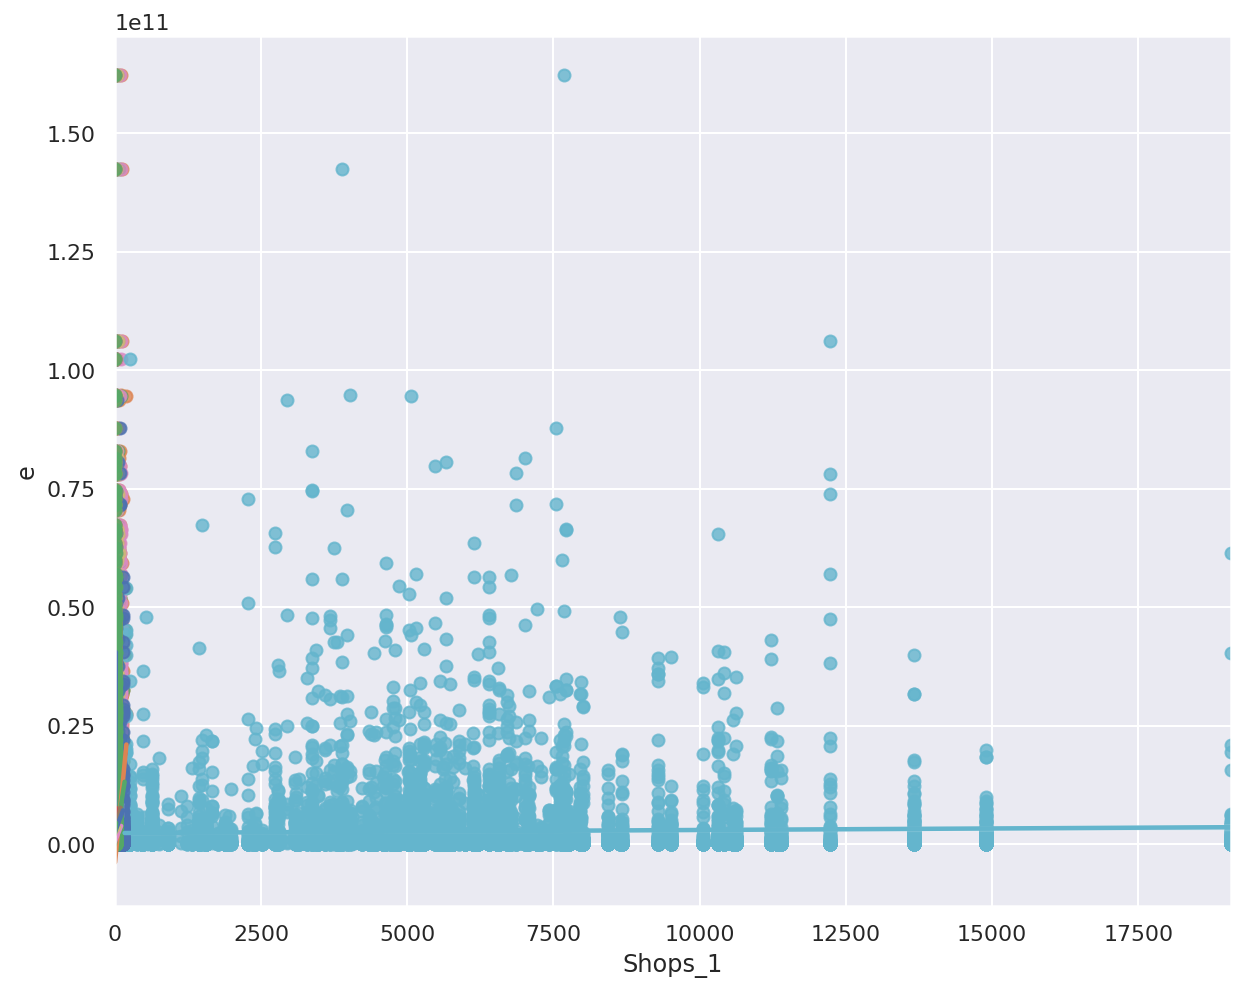

In [681]:
for f in numeric_features:
    sns.regplot(data=df, x = f, y = "e")

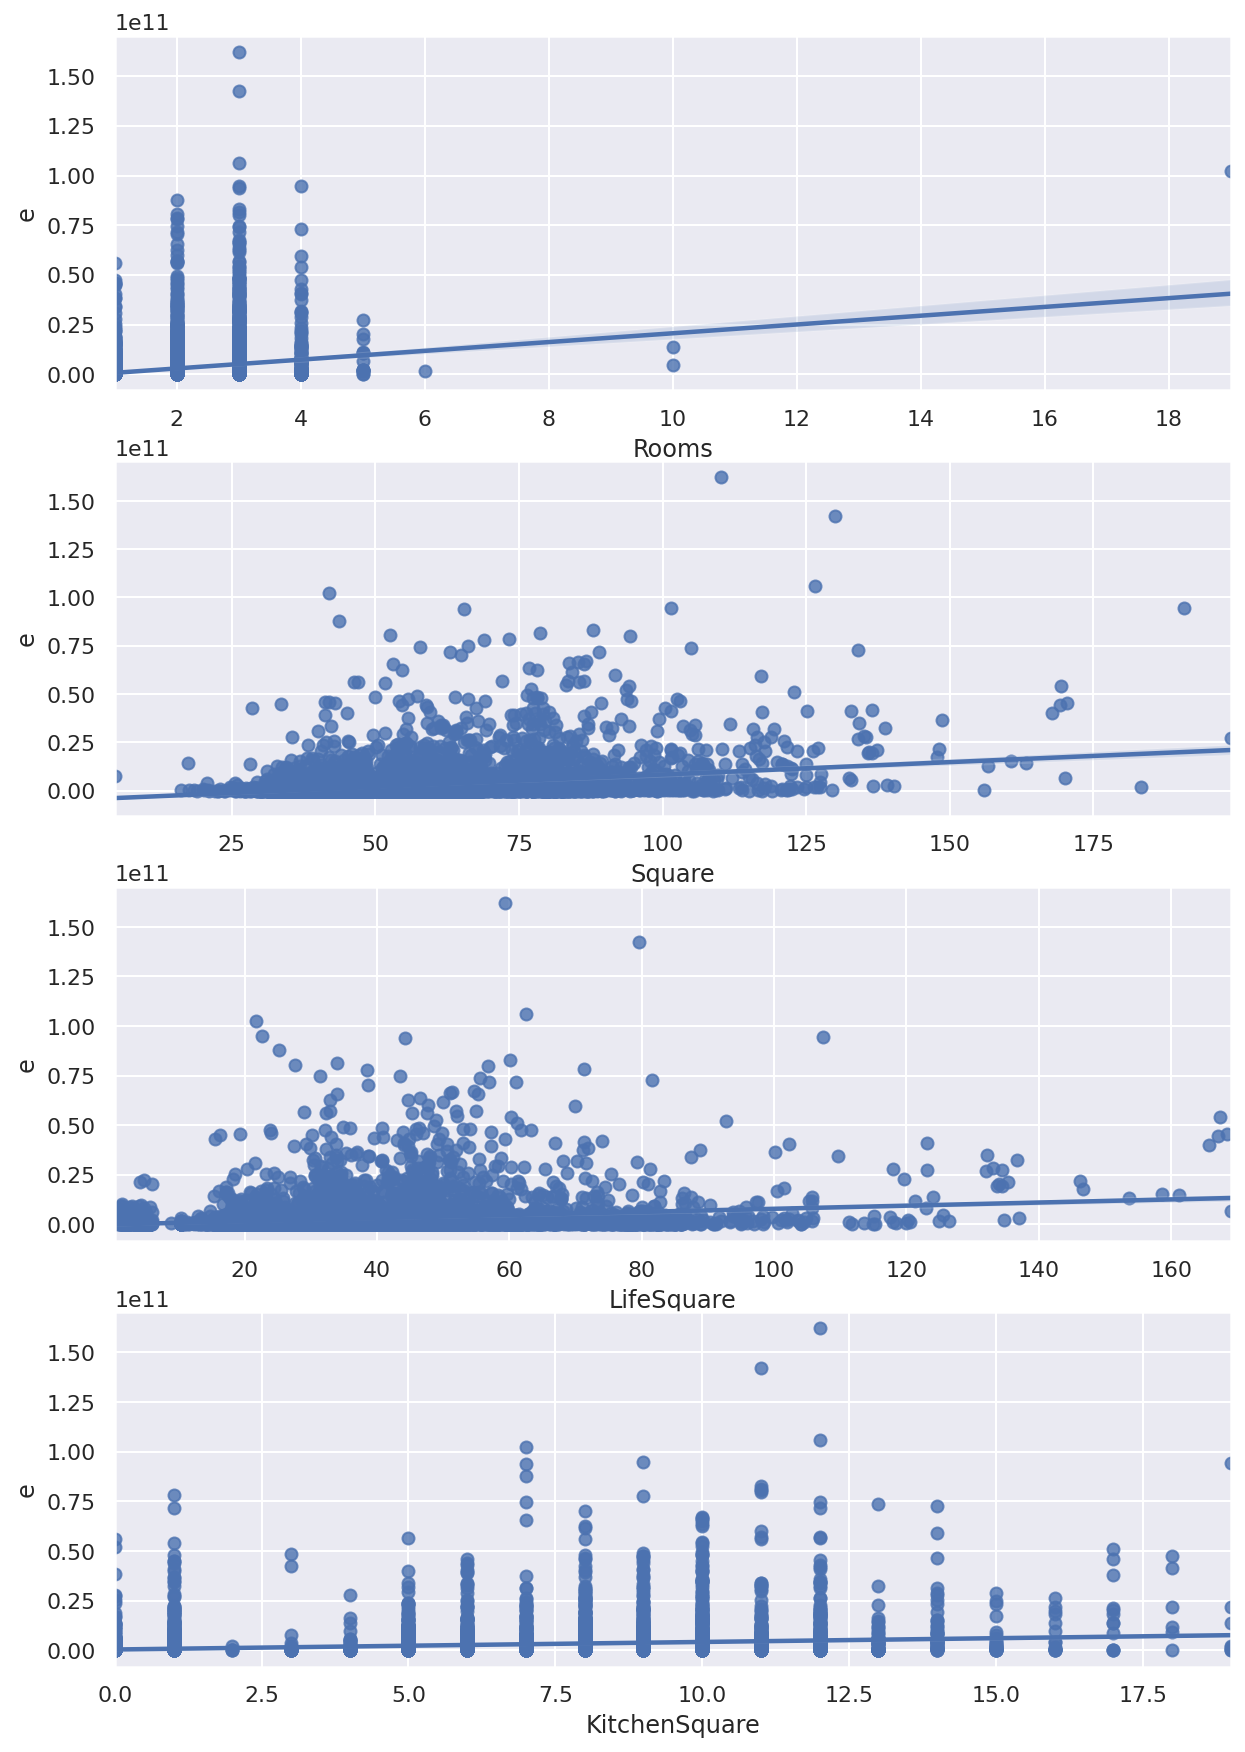

In [682]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=len(numeric_features[:4]))

fig.set_figheight(15)
fig.set_figwidth(10)

for i, f in enumerate(numeric_features[:4]):
    sns.regplot(data=df, x = f, y = "e", ax=axs[i])

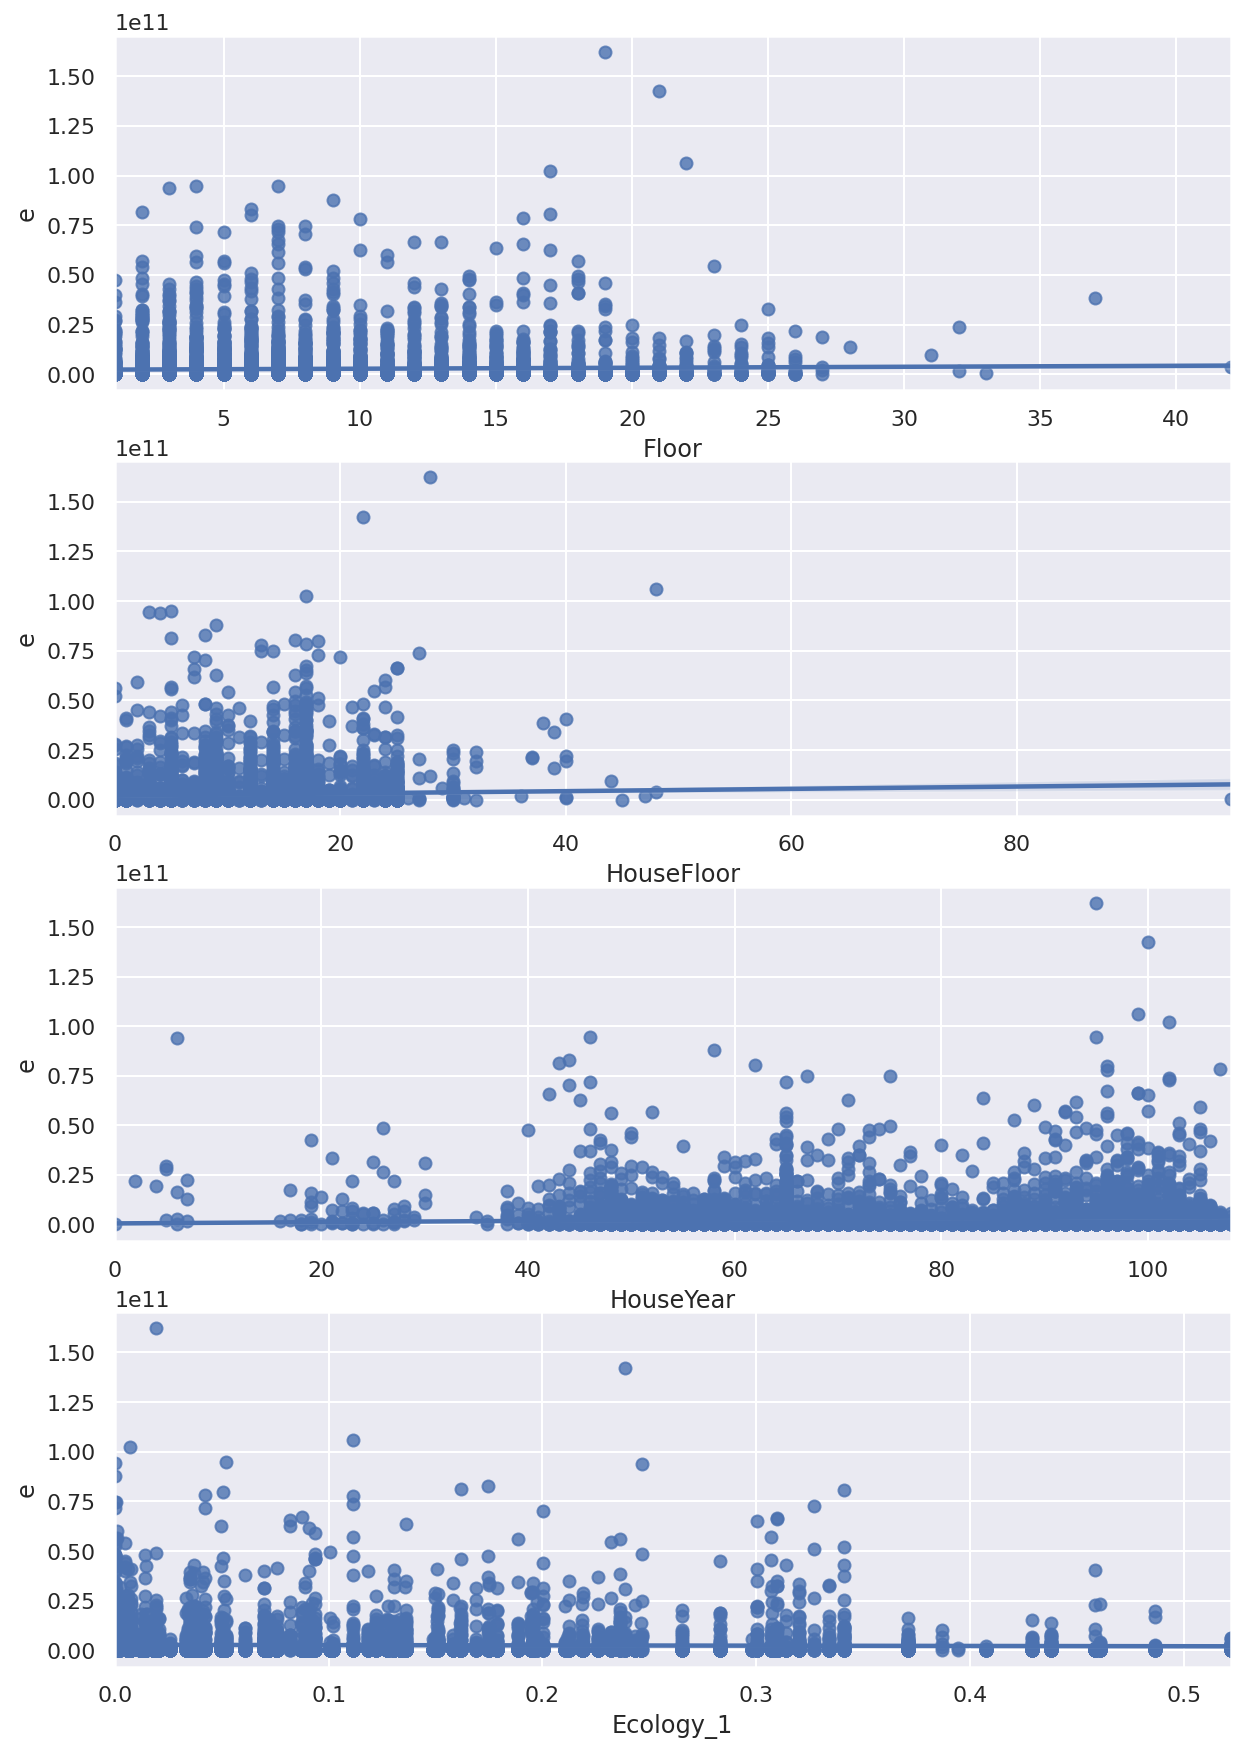

In [683]:
fig, axs = plt.subplots(nrows=len(numeric_features[4:8]))

fig.set_figheight(15)
fig.set_figwidth(10)

for i, f in enumerate(numeric_features[4:8]):
    sns.regplot(data=df, x = f, y = "e", ax=axs[i])

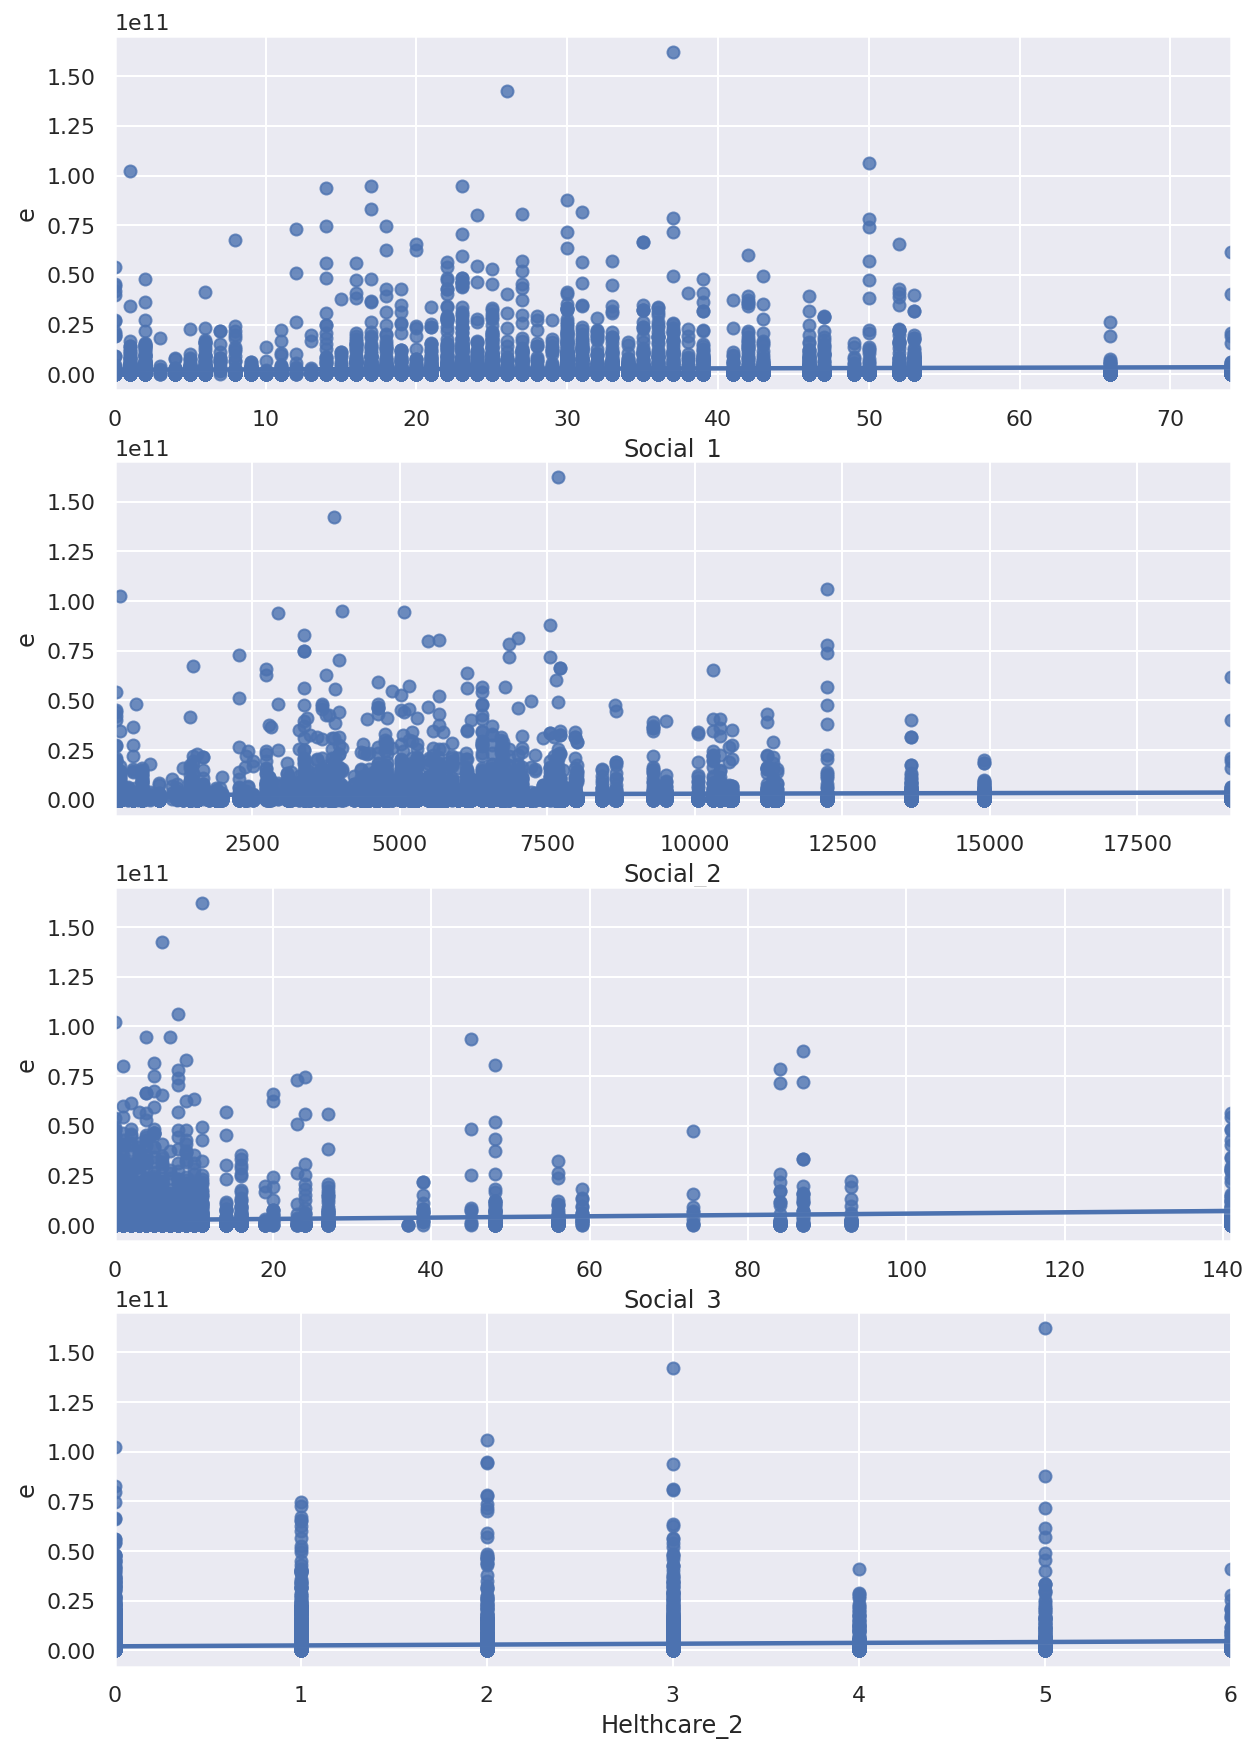

In [684]:
fig, axs = plt.subplots(nrows=len(numeric_features[8:12]))

fig.set_figheight(15)
fig.set_figwidth(10)

for i, f in enumerate(numeric_features[8:12]):
    sns.regplot(data=df, x = f, y = "e", ax=axs[i])

In [685]:
df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,Price_bin,preds,e
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,57,0.089040,...,33,7976,5,0,11,B,184966.930730,200k,211010.048157,1.812367e+09
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,66,0.000070,...,46,10309,1,1,16,B,300009.450063,350k,275217.088729,4.307677e+08
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,56,0.049637,...,34,7759,0,1,3,B,220925.908524,250k,226228.117622,1.293621e+07
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,64,0.012339,...,35,5776,1,2,4,B,150226.531644,200k,157331.562278,3.708004e+07
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,99,0.309479,...,35,7715,4,0,6,B,215898.447742,250k,334694.123694,1.097871e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,56,0.135650,...,46,7960,6,3,11,B,196684.316040,200k,245767.988097,1.321988e+09
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,88,0.000000,...,30,5562,0,0,5,A,189050.289571,200k,168052.736355,5.942504e+08
9997,5123,27,1.0,47.939008,45.939008,1.0,12,16.0,103,0.072158,...,2,629,1,0,0,A,159143.805370,200k,127922.875404,9.964218e+08
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,49,0.307467,...,30,5048,9,2,5,B,181595.339808,200k,180839.858413,6.557285e+06


In [686]:
from statsmodels.stats.diagnostic import het_white, het_goldfeldquandt

In [697]:
het_white(fit_un.resid[:1000], fit_un.model.exog[:1000])

(972.3612048264864,
 6.445662289812145e-10,
 13.768619280957399,
 1.1329838099229477e-96)

In [717]:
het_goldfeldquandt(y=fit_un.model.endog, x=fit_un.model.exog, idx=206, drop=0.2)

(0.9182085898855225, 0.9775551347800013, 'increasing')

In [745]:
for i, k in enumerate(fit_un.params.keys()):
    if i < 200:
        continue
    p_value = het_goldfeldquandt(y=fit_un.model.endog, x=fit_un.model.exog, idx=i, drop=0.2)[1]
    if p_value < 0.05:
        print(k, ": p-value=", p_value)

Rooms : p-value= 4.558082936019112e-201
Square : p-value= 1.0262630303280088e-294
LifeSquare : p-value= 6.81693981448243e-169
HouseFloor : p-value= 0.0035374194269917583
HouseYear : p-value= 5.382548581231274e-47
Social_3 : p-value= 4.4366372060580097e-131
Helthcare_2 : p-value= 2.1637614056260017e-28
Shops_1 : p-value= 3.11273604159192e-26


In [731]:
het_goldfeldquandt(y=fit_un.model.endog.sort(), x=fit_un.model.exog.sort(), idx=0, drop=0.0)

ValueError: not enough values to unpack (expected 2, got 0)

In [732]:
fit_un.model.exog

array([[  0.        ,   0.        ,   0.        , ...,  30.10331164,
         52.64409938,  82.        ],
       [  0.        ,   0.        ,   0.        , ...,  23.28334145,
         40.53133382,  56.        ],
       [  0.        ,   0.        ,   0.        , ...,  60.58532614,
         65.        , 141.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,  46.48336522,
         62.34636249,  70.        ],
       [  0.        ,   0.        ,   0.        , ...,  22.12046293,
         34.70330201,  62.        ],
       [  0.        ,   0.        ,   0.        , ...,  41.14115575,
         62.47479823, 106.        ]])